In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
import tensorflow as tf

In [45]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"tension_strenght": "tensile_strength"})
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tensile_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [47]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))
    print()

layer_height: [0.02 0.06 0.1  0.15 0.2 ]

wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]

infill_density: [90 80 70 40 10 20 50 30 60]

infill_pattern: ['grid' 'honeycomb']

nozzle_temperature: [220 225 230 240 250 200 205 210 215]

bed_temperature: [60 65 70 75 80]

print_speed: [ 40  60 120]

material: ['abs' 'pla']

fan_speed: [  0  25  50  75 100]

roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]

tensile_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]

elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]



In [48]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df.material = [0 if each=='abs' else 1 for each in df.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df.infill_pattern = [0 if each=='grid' else 1 for each in df.infill_pattern]

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [49]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [50]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


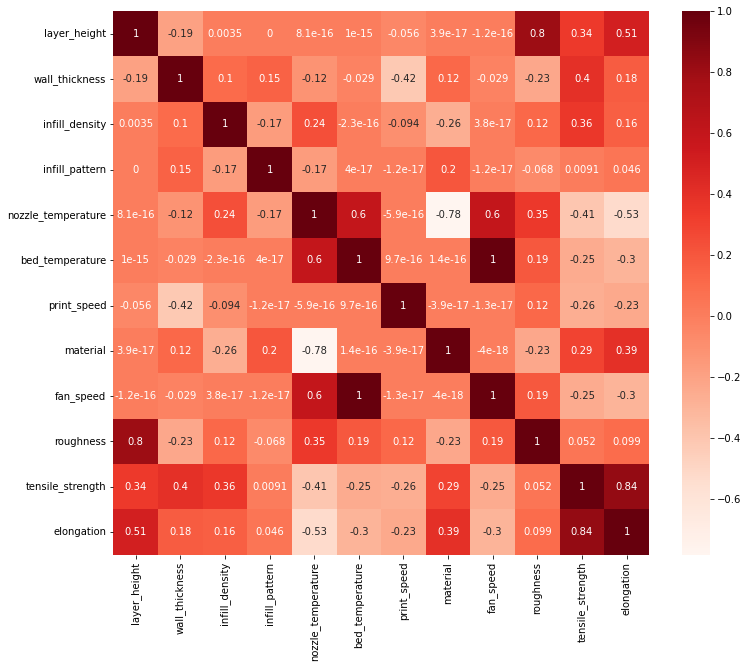

In [51]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds) #Using Pearson Correlation
plt.show()

In [55]:
target_cols = ['tensile_strength', 'roughness', 'elongation']
Y = df[target_cols].values
drop_cols = ['tensile_strength', 'roughness', 'elongation', 'infill_pattern', 'material']
X = df.drop(drop_cols,axis=1).values

In [56]:
X.shape

(50, 7)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.09)
print(X_train.shape)
print(Y_test.shape)

(45, 7)
(5, 3)


In [59]:
# Construct a NN model using functional API
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten

inputvec = Input( shape=(7,) )
x = Dense( 16, activation='relu' )(inputvec)
x = Dense( 32, activation='relu' )(x)
x = Dense( 64, activation='relu' )(x)
#x = Dropout(0.5)(x)
x = Dense( 32, activation='relu' )(x)
x = Dense( 16, activation='relu' )(x)
x = Dense( 8, activation='relu' )(x)
#x = Dropout(0.25)(x)
preds = Dense(3, activation='linear' )(x)

model = Model(name= 'NN_model_2_1', inputs = inputvec,outputs=preds)
model.summary()

Model: "NN_model_2_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_49 (Dense)            (None, 16)                128       
                                                                 
 dense_50 (Dense)            (None, 32)                544       
                                                                 
 dense_51 (Dense)            (None, 64)                2112      
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 8)                

In [60]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Epoch 1/1000
9/9 [==============================] - 1s 3ms/step - loss: 23687.3633 - accuracy: 0.5111
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 19541.6699 - accuracy: 0.4667
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 14184.6162 - accuracy: 0.4667
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 8282.5146 - accuracy: 0.4667
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 6487.8848 - accuracy: 0.4667
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 6215.9126 - accuracy: 0.4667
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 5958.5786 - accuracy: 0.4667
Epoch 8/1000
9/9 [==============================] - 0s 2ms/step - loss: 5961.0425 - accuracy: 0.4667
Epoch 9/1000
9/9 [==============================] - 0s 2ms/step - loss: 5816.6079 - accuracy: 0.4667
Epoch 10/1000
9/9 [==============================] - 0s 1ms/step - loss: 5783.6660 - acc

9/9 [==============================] - 0s 1ms/step - loss: 2416.2141 - accuracy: 0.5333
Epoch 82/1000
9/9 [==============================] - 0s 1ms/step - loss: 2421.6201 - accuracy: 0.5111
Epoch 83/1000
9/9 [==============================] - 0s 1ms/step - loss: 2482.6704 - accuracy: 0.4667
Epoch 84/1000
9/9 [==============================] - 0s 1ms/step - loss: 2393.3723 - accuracy: 0.4889
Epoch 85/1000
9/9 [==============================] - 0s 997us/step - loss: 2430.7104 - accuracy: 0.5111
Epoch 86/1000
9/9 [==============================] - 0s 1ms/step - loss: 2422.7839 - accuracy: 0.5333
Epoch 87/1000
9/9 [==============================] - 0s 1ms/step - loss: 2481.8315 - accuracy: 0.4667
Epoch 88/1000
9/9 [==============================] - 0s 1ms/step - loss: 2466.0388 - accuracy: 0.5333
Epoch 89/1000
9/9 [==============================] - 0s 1ms/step - loss: 2450.5356 - accuracy: 0.5111
Epoch 90/1000
9/9 [==============================] - 0s 1ms/step - loss: 2409.6975 - accuracy:

9/9 [==============================] - 0s 1ms/step - loss: 1890.4351 - accuracy: 0.6222
Epoch 161/1000
9/9 [==============================] - 0s 1ms/step - loss: 1576.7859 - accuracy: 0.6444
Epoch 162/1000
9/9 [==============================] - 0s 1ms/step - loss: 1612.0116 - accuracy: 0.6222
Epoch 163/1000
9/9 [==============================] - 0s 997us/step - loss: 1559.4816 - accuracy: 0.6667
Epoch 164/1000
9/9 [==============================] - 0s 1ms/step - loss: 1515.2014 - accuracy: 0.6667
Epoch 165/1000
9/9 [==============================] - 0s 1ms/step - loss: 1513.7604 - accuracy: 0.6889
Epoch 166/1000
9/9 [==============================] - 0s 1ms/step - loss: 1534.5266 - accuracy: 0.6444
Epoch 167/1000
9/9 [==============================] - 0s 997us/step - loss: 1625.3679 - accuracy: 0.6667
Epoch 168/1000
9/9 [==============================] - 0s 1ms/step - loss: 1516.0436 - accuracy: 0.6667
Epoch 169/1000
9/9 [==============================] - 0s 1ms/step - loss: 1602.1564 

9/9 [==============================] - 0s 1ms/step - loss: 843.2003 - accuracy: 0.8889
Epoch 240/1000
9/9 [==============================] - 0s 1ms/step - loss: 871.2067 - accuracy: 0.8222
Epoch 241/1000
9/9 [==============================] - 0s 1ms/step - loss: 822.3165 - accuracy: 0.8667
Epoch 242/1000
9/9 [==============================] - 0s 1ms/step - loss: 817.2143 - accuracy: 0.8667
Epoch 243/1000
9/9 [==============================] - 0s 1ms/step - loss: 761.1201 - accuracy: 0.8889
Epoch 244/1000
9/9 [==============================] - 0s 1ms/step - loss: 826.4313 - accuracy: 0.8667
Epoch 245/1000
9/9 [==============================] - 0s 1ms/step - loss: 835.5290 - accuracy: 0.8667
Epoch 246/1000
9/9 [==============================] - 0s 997us/step - loss: 769.2722 - accuracy: 0.8667
Epoch 247/1000
9/9 [==============================] - 0s 1ms/step - loss: 775.1105 - accuracy: 0.8889
Epoch 248/1000
9/9 [==============================] - 0s 1ms/step - loss: 820.5660 - accuracy: 

9/9 [==============================] - 0s 1ms/step - loss: 507.6356 - accuracy: 0.9111
Epoch 320/1000
9/9 [==============================] - 0s 1ms/step - loss: 485.6922 - accuracy: 0.9111
Epoch 321/1000
9/9 [==============================] - 0s 1ms/step - loss: 495.6062 - accuracy: 0.8667
Epoch 322/1000
9/9 [==============================] - 0s 1ms/step - loss: 483.5204 - accuracy: 0.9111
Epoch 323/1000
9/9 [==============================] - 0s 1ms/step - loss: 499.8464 - accuracy: 0.9111
Epoch 324/1000
9/9 [==============================] - 0s 1ms/step - loss: 507.3777 - accuracy: 0.8889
Epoch 325/1000
9/9 [==============================] - 0s 1ms/step - loss: 519.9233 - accuracy: 0.9111
Epoch 326/1000
9/9 [==============================] - 0s 1ms/step - loss: 475.3503 - accuracy: 0.8889
Epoch 327/1000
9/9 [==============================] - 0s 1ms/step - loss: 472.7019 - accuracy: 0.9111
Epoch 328/1000
9/9 [==============================] - 0s 2ms/step - loss: 501.7790 - accuracy: 0.

9/9 [==============================] - 0s 1ms/step - loss: 277.7718 - accuracy: 0.9333
Epoch 400/1000
9/9 [==============================] - 0s 1ms/step - loss: 295.4232 - accuracy: 0.9333
Epoch 401/1000
9/9 [==============================] - 0s 1ms/step - loss: 293.0948 - accuracy: 0.8889
Epoch 402/1000
9/9 [==============================] - 0s 1ms/step - loss: 245.2822 - accuracy: 0.9556
Epoch 403/1000
9/9 [==============================] - 0s 1ms/step - loss: 378.8351 - accuracy: 0.9111
Epoch 404/1000
9/9 [==============================] - 0s 1ms/step - loss: 437.2456 - accuracy: 0.9333
Epoch 405/1000
9/9 [==============================] - 0s 1ms/step - loss: 280.9156 - accuracy: 0.9111
Epoch 406/1000
9/9 [==============================] - 0s 2ms/step - loss: 250.8520 - accuracy: 0.9111
Epoch 407/1000
9/9 [==============================] - 0s 1ms/step - loss: 261.6321 - accuracy: 0.9333
Epoch 408/1000
9/9 [==============================] - 0s 1ms/step - loss: 211.4437 - accuracy: 0.

9/9 [==============================] - 0s 1ms/step - loss: 127.9912 - accuracy: 1.0000
Epoch 480/1000
9/9 [==============================] - 0s 1ms/step - loss: 131.5670 - accuracy: 0.9778
Epoch 481/1000
9/9 [==============================] - 0s 1ms/step - loss: 136.7503 - accuracy: 0.9556
Epoch 482/1000
9/9 [==============================] - 0s 1ms/step - loss: 121.8329 - accuracy: 1.0000
Epoch 483/1000
9/9 [==============================] - 0s 1ms/step - loss: 118.6242 - accuracy: 0.9778
Epoch 484/1000
9/9 [==============================] - 0s 1ms/step - loss: 122.1414 - accuracy: 1.0000
Epoch 485/1000
9/9 [==============================] - 0s 1ms/step - loss: 174.4095 - accuracy: 0.9556
Epoch 486/1000
9/9 [==============================] - 0s 1ms/step - loss: 173.6602 - accuracy: 0.9778
Epoch 487/1000
9/9 [==============================] - 0s 1ms/step - loss: 181.8816 - accuracy: 0.9778
Epoch 488/1000
9/9 [==============================] - 0s 1ms/step - loss: 150.8395 - accuracy: 0.

9/9 [==============================] - 0s 997us/step - loss: 96.6803 - accuracy: 1.0000
Epoch 560/1000
9/9 [==============================] - 0s 1ms/step - loss: 73.5008 - accuracy: 1.0000
Epoch 561/1000
9/9 [==============================] - 0s 1ms/step - loss: 78.7006 - accuracy: 0.9778
Epoch 562/1000
9/9 [==============================] - 0s 1ms/step - loss: 85.7814 - accuracy: 0.9778
Epoch 563/1000
9/9 [==============================] - 0s 1ms/step - loss: 83.7483 - accuracy: 0.9778
Epoch 564/1000
9/9 [==============================] - 0s 1ms/step - loss: 82.7043 - accuracy: 1.0000
Epoch 565/1000
9/9 [==============================] - 0s 1ms/step - loss: 86.2065 - accuracy: 0.9778
Epoch 566/1000
9/9 [==============================] - 0s 1ms/step - loss: 83.2403 - accuracy: 0.9556
Epoch 567/1000
9/9 [==============================] - 0s 1ms/step - loss: 88.8582 - accuracy: 0.9778
Epoch 568/1000
9/9 [==============================] - 0s 1ms/step - loss: 75.5814 - accuracy: 0.9778
Epo

9/9 [==============================] - 0s 1ms/step - loss: 68.1952 - accuracy: 1.0000
Epoch 641/1000
9/9 [==============================] - 0s 1ms/step - loss: 65.7232 - accuracy: 0.9778
Epoch 642/1000
9/9 [==============================] - 0s 1ms/step - loss: 76.1007 - accuracy: 1.0000
Epoch 643/1000
9/9 [==============================] - 0s 1ms/step - loss: 73.6769 - accuracy: 0.9556
Epoch 644/1000
9/9 [==============================] - 0s 1ms/step - loss: 65.8963 - accuracy: 1.0000
Epoch 645/1000
9/9 [==============================] - 0s 1ms/step - loss: 76.8561 - accuracy: 0.9778
Epoch 646/1000
9/9 [==============================] - 0s 1ms/step - loss: 68.4808 - accuracy: 0.9778
Epoch 647/1000
9/9 [==============================] - 0s 1ms/step - loss: 69.8330 - accuracy: 0.9556
Epoch 648/1000
9/9 [==============================] - 0s 1ms/step - loss: 67.1365 - accuracy: 1.0000
Epoch 649/1000
9/9 [==============================] - 0s 1ms/step - loss: 71.6569 - accuracy: 0.9556
Epoch

9/9 [==============================] - 0s 1ms/step - loss: 51.1024 - accuracy: 0.9778
Epoch 722/1000
9/9 [==============================] - 0s 1ms/step - loss: 52.9358 - accuracy: 0.9778
Epoch 723/1000
9/9 [==============================] - 0s 1ms/step - loss: 63.0967 - accuracy: 1.0000
Epoch 724/1000
9/9 [==============================] - 0s 1ms/step - loss: 96.3404 - accuracy: 0.9778
Epoch 725/1000
9/9 [==============================] - 0s 1ms/step - loss: 68.1075 - accuracy: 0.9778
Epoch 726/1000
9/9 [==============================] - 0s 1ms/step - loss: 59.5144 - accuracy: 1.0000
Epoch 727/1000
9/9 [==============================] - 0s 1ms/step - loss: 43.2057 - accuracy: 1.0000
Epoch 728/1000
9/9 [==============================] - 0s 1ms/step - loss: 41.8859 - accuracy: 0.9778
Epoch 729/1000
9/9 [==============================] - 0s 1ms/step - loss: 44.7651 - accuracy: 0.9778
Epoch 730/1000
9/9 [==============================] - 0s 1ms/step - loss: 58.0785 - accuracy: 1.0000
Epoch

9/9 [==============================] - 0s 1ms/step - loss: 73.8174 - accuracy: 1.0000
Epoch 803/1000
9/9 [==============================] - 0s 1ms/step - loss: 45.7899 - accuracy: 1.0000
Epoch 804/1000
9/9 [==============================] - 0s 1ms/step - loss: 59.3025 - accuracy: 0.9778
Epoch 805/1000
9/9 [==============================] - 0s 1ms/step - loss: 51.0965 - accuracy: 0.9778
Epoch 806/1000
9/9 [==============================] - 0s 1ms/step - loss: 60.2785 - accuracy: 0.9778
Epoch 807/1000
9/9 [==============================] - 0s 989us/step - loss: 82.5083 - accuracy: 0.9778
Epoch 808/1000
9/9 [==============================] - 0s 1ms/step - loss: 76.8805 - accuracy: 0.9778
Epoch 809/1000
9/9 [==============================] - 0s 1ms/step - loss: 62.8415 - accuracy: 0.9556
Epoch 810/1000
9/9 [==============================] - 0s 1ms/step - loss: 79.8392 - accuracy: 0.9556
Epoch 811/1000
9/9 [==============================] - 0s 1ms/step - loss: 49.2112 - accuracy: 0.9778
Epo

9/9 [==============================] - 0s 1ms/step - loss: 26.1392 - accuracy: 1.0000
Epoch 884/1000
9/9 [==============================] - 0s 1ms/step - loss: 26.2668 - accuracy: 0.9778
Epoch 885/1000
9/9 [==============================] - 0s 1ms/step - loss: 28.2419 - accuracy: 1.0000
Epoch 886/1000
9/9 [==============================] - 0s 1ms/step - loss: 32.1117 - accuracy: 1.0000
Epoch 887/1000
9/9 [==============================] - 0s 877us/step - loss: 30.9255 - accuracy: 0.9778
Epoch 888/1000
9/9 [==============================] - 0s 1ms/step - loss: 32.8113 - accuracy: 1.0000
Epoch 889/1000
9/9 [==============================] - 0s 1ms/step - loss: 29.3350 - accuracy: 1.0000
Epoch 890/1000
9/9 [==============================] - 0s 1ms/step - loss: 34.5688 - accuracy: 0.9778
Epoch 891/1000
9/9 [==============================] - 0s 958us/step - loss: 35.8090 - accuracy: 0.9778
Epoch 892/1000
9/9 [==============================] - 0s 1ms/step - loss: 31.1107 - accuracy: 0.9778
E

9/9 [==============================] - 0s 997us/step - loss: 21.9342 - accuracy: 1.0000
Epoch 964/1000
9/9 [==============================] - 0s 1ms/step - loss: 21.1031 - accuracy: 1.0000
Epoch 965/1000
9/9 [==============================] - 0s 1ms/step - loss: 21.5245 - accuracy: 1.0000
Epoch 966/1000
9/9 [==============================] - 0s 1ms/step - loss: 20.4803 - accuracy: 0.9778
Epoch 967/1000
9/9 [==============================] - 0s 1ms/step - loss: 22.3227 - accuracy: 0.9778
Epoch 968/1000
9/9 [==============================] - 0s 1ms/step - loss: 19.7838 - accuracy: 0.9778
Epoch 969/1000
9/9 [==============================] - 0s 1ms/step - loss: 21.3827 - accuracy: 1.0000
Epoch 970/1000
9/9 [==============================] - 0s 1ms/step - loss: 19.6484 - accuracy: 1.0000
Epoch 971/1000
9/9 [==============================] - 0s 1ms/step - loss: 25.9979 - accuracy: 0.9778
Epoch 972/1000
9/9 [==============================] - 0s 1ms/step - loss: 20.8669 - accuracy: 0.9778
Epo

Text(0, 0.5, 'mean squared error')

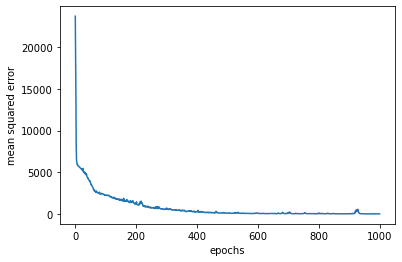

In [61]:
# Fit model to the data (train the model)
from keras.callbacks import History
history = History()

model.fit(X_train, Y_train, batch_size=5, epochs=1000, verbose=1, callbacks=[history])
# Batch size = 50 (all samples), epoch number = 10000 (the learning algorithm works through the entire dataset for 10000 times)
print('Done!')

# Plot the loss history
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mean squared error")

1/1 [==============================] - 0s 20ms/step - loss: 2451.9404 - accuracy: 0.6000
[2451.9404296875, 0.6000000238418579]


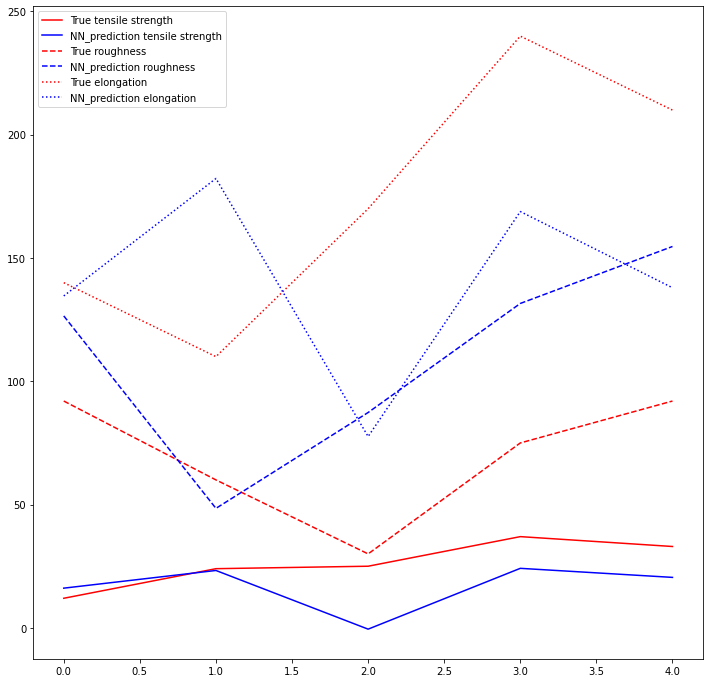

In [64]:
# Evaluate the accuracy of the model (loss: mean squared error, as defined in the step of compiling)
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

# Batch prediction & plot
Y_pred = model.predict(X_test)


plt.show()
plt.figure(figsize=(12, 12))
line1, = plt.plot(Y_test[:,0],'r-')
line2, = plt.plot(Y_pred[:,0],'b-')
line3, = plt.plot(Y_test[:,1],'r--')
line4, = plt.plot(Y_pred[:,1],'b--')
line5, = plt.plot(Y_test[:,2],'r:')
line6, = plt.plot(Y_pred[:,2],'b:')
plt.legend([line1, line2, line3, line4, line5, line6], ['True tensile strength', 'NN_prediction tensile strength', 'True roughness', 'NN_prediction roughness', 'True elongation', 'NN_prediction elongation'])